In [1]:
import numpy as np
phases = np.random.rand(2**3)
diag = np.exp(1j * phases)
phases

array([0.69878433, 0.54670788, 0.97866499, 0.48623312, 0.02386728,
       0.39320866, 0.29477574, 0.8630937 ])

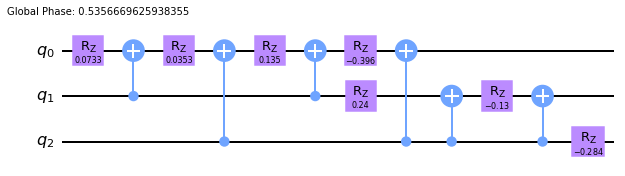

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import Diagonal

circ = QuantumCircuit(3)
circ.append(Diagonal(diag), circ.qubits)
circ.decompose(reps=4).draw("mpl")

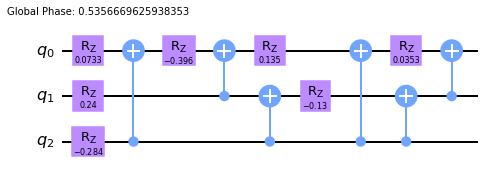

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew

circ = QuantumCircuit(3)
circ.append(DiagonalNew(diag), circ.qubits)
circ.decompose(reps=2).draw("mpl")

In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew
import numpy as np

testdata = (
    [0, 0],
    [0, 0.8],
    [0, 0, 1, 1],
    [0, 1, 0.5, 1],
    (2 * np.pi * np.random.rand(2**3)),
    (2 * np.pi * np.random.rand(2**4)),
    (2 * np.pi * np.random.rand(2**5)),
)
def test_diag_gate(phases):
    """Test correctness of diagonal decomposition."""
    diag = [np.exp(1j * ph) for ph in phases]
    qc = DiagonalNew(diag)
    simulated_diag = Statevector(Operator(qc).data.diagonal()).data
    ref_diag = Statevector(diag).data
    print(simulated_diag)
    print(ref_diag)

    assert matrix_equal(simulated_diag, ref_diag, ignore_phase=False)

for test in testdata:
    print("test:", test)
    test_diag_gate(test)

test: [0, 0]
[1.+0.j 1.+0.j]
[1.+0.j 1.+0.j]
test: [0, 0.8]
[1.        +0.j         0.69670671+0.71735609j]
[1.        +0.j         0.69670671+0.71735609j]
test: [0, 0, 1, 1]
[1.        +0.j         1.        +0.j         0.54030231+0.84147098j
 0.54030231+0.84147098j]
[1.        +0.j         1.        +0.j         0.54030231+0.84147098j
 0.54030231+0.84147098j]
test: [0, 1, 0.5, 1]
[1.        +4.16333634e-17j 0.54030231+8.41470985e-01j
 0.87758256+4.79425539e-01j 0.54030231+8.41470985e-01j]
[1.        +0.j         0.54030231+0.84147098j 0.87758256+0.47942554j
 0.54030231+0.84147098j]
test: [3.28999059 2.1745702  5.52723856 4.79796392 3.04559373 5.28733026
 2.62613885 0.6409816 ]
[-0.98900922-0.14785387j -0.56775316+0.82319885j  0.72762242-0.68597785j
  0.08547054-0.9963407j  -0.99539564+0.09585154j  0.54378551-0.83922424j
 -0.87006912+0.49292974j  0.80150917+0.59798249j]
[-0.98900922-0.14785387j -0.56775316+0.82319885j  0.72762242-0.68597785j
  0.08547054-0.9963407j  -0.99539564+0.095

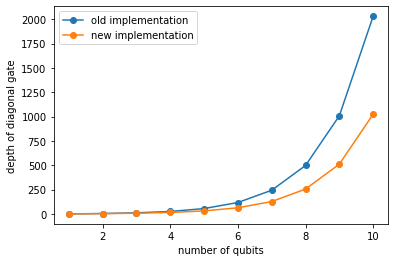

In [7]:
from qiskit.circuit.library import Diagonal
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew

import numpy as np
from qiskit import QuantumCircuit

old_depth = []
new_depth = []
nq_list = list(range(1, 11))
for nq in nq_list:
    diag = np.exp(1j * np.random.rand(2**nq))

    circ = QuantumCircuit(nq)
    circ.append(Diagonal(diag), circ.qubits)
    old_depth.append(circ.decompose(reps=4).depth())

    circ = QuantumCircuit(nq)
    circ.append(DiagonalNew(diag), circ.qubits)
    new_depth.append(circ.decompose(reps=2).depth())

import matplotlib.pyplot as plt
plt.plot(nq_list, old_depth, label="old implementation", marker="o")
plt.plot(nq_list, new_depth, label="new implementation", marker="o")
plt.legend()
plt.xlabel("number of qubits")
plt.ylabel("depth of diagonal gate")
plt.show()